In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Gujarat1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,15,0,0,0,-4,0,0,0,0,0,0,0
131396,2014,12,31,20,0,14,0,0,0,-4,0,0,0,0,0,0,0
131397,2014,12,31,21,0,14,0,0,0,-4,0,0,0,0,0,0,0
131398,2014,12,31,22,0,13,0,0,0,-4,0,0,0,0,0,0,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0,2000-01-01 02:00:00
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128,2000-01-01 03:00:00
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337,2000-01-01 04:00:00
5,2000,1,1,5,0,26,149,731,531,-4,140,140,713,713,0,513,513,2000-01-01 05:00:00
6,2000,1,1,6,0,29,164,796,666,-6,154,154,770,770,0,640,640,2000-01-01 06:00:00
7,2000,1,1,7,0,31,171,822,734,-6,153,153,818,818,0,714,714,2000-01-01 07:00:00
8,2000,1,1,8,0,32,170,819,729,-5,184,184,748,748,0,695,695,2000-01-01 08:00:00
9,2000,1,1,9,0,32,162,786,652,-4,147,147,786,786,0,637,637,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,226.1
2000-01-02,227.8
2000-01-03,227.9
2000-01-04,225.9
2000-01-05,228.8
...,...
2014-12-27,214.8
2014-12-28,217.3
2014-12-29,216.4


In [8]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,229.128571
2000-01-14,235.128571
2000-01-21,244.942857
2000-01-28,256.471429
2000-02-04,253.357143
...,...
2014-12-05,203.471429
2014-12-12,204.757143
2014-12-19,204.271429


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-07,229.128571
2000-01-14,235.128571
2000-01-21,244.942857
2000-01-28,256.471429
2000-02-04,253.357143
...,...
2011-12-02,188.628571
2011-12-09,206.000000
2011-12-16,208.214286


In [10]:
y[:4382]

,GHI
Date,
2000-01-01,226.1
2000-01-02,227.8
2000-01-03,227.9
2000-01-04,225.9
2000-01-05,228.8
...,...
2011-12-29,218.8
2011-12-30,218.8
2011-12-31,217.8


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [14]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [15]:
X_T[:626]

array([[226.1, 227.8, 227.9, ..., 228.8, 235.1, 232.3],
       [229.1, 232.9, 233.9, ..., 230.9, 242.2, 242.5],
       [239.8, 239.1, 245.3, ..., 251.3, 249.2, 242.2],
       ...,
       [207. , 206.9, 210.2, ..., 210.4, 209.5, 210.6],
       [211.3, 212.2, 212.8, ..., 212.2, 210.7, 210.9],
       [215.5, 218.6, 218.8, ..., 217.8, 217.9, 223.8]])

In [16]:
Y_T[:626].shape

(626,)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

X_T=X_T.reshape(X_T.shape[0],X_T.shape[1],1)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7,1))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[216.72081]]
[[234.14345]]
[[246.20883]]
[[230.26006]]
[[246.42703]]
[[270.05005]]
[[288.115]]
[[301.3536]]
[[302.98038]]
[[311.2188]]
[[325.91937]]
[[332.81015]]
[[336.22324]]
[[340.32886]]
[[339.91843]]
[[299.61597]]
[[352.04535]]
[[342.11765]]
[[332.84103]]
[[344.8595]]
[[347.37814]]
[[337.56137]]
[[328.39603]]
[[279.35645]]
[[304.577]]
[[301.84714]]
[[268.28162]]
[[265.62653]]
[[262.63364]]
[[252.48915]]
[[229.11797]]
[[266.09717]]
[[266.0102]]
[[221.99545]]
[[263.45703]]
[[176.46332]]
[[226.47636]]
[[285.8013]]
[[274.81116]]
[[280.69138]]
[[265.98367]]
[[244.71301]]
[[236.4842]]
[[227.76912]]
[[215.70996]]
[[209.6953]]
[[202.46924]]
[[199.15948]]
[[201.5845]]
[[195.84871]]
[[211.59514]]
[[213.81934]]
[[222.17203]]
[[232.14157]]
[[172.0263]]
[[256.1089]]
[[256.5233]]
[[271.43497]]
[[281.97702]]
[[302.6909]]
[[312.64786]]
[[323.7921]]
[[329.9265]]
[[326.88577]]
[[330.83762]]
[[324.82504]]
[[335.25186]]
[[305.58118]]
[[336.92758]]
[[353.17322]]
[[355.553]]
[[358.51608]]
[[355.4823]]

[array([[216.72081]], dtype=float32),
 array([[234.14345]], dtype=float32),
 array([[246.20883]], dtype=float32),
 array([[230.26006]], dtype=float32),
 array([[246.42703]], dtype=float32),
 array([[270.05005]], dtype=float32),
 array([[288.115]], dtype=float32),
 array([[301.3536]], dtype=float32),
 array([[302.98038]], dtype=float32),
 array([[311.2188]], dtype=float32),
 array([[325.91937]], dtype=float32),
 array([[332.81015]], dtype=float32),
 array([[336.22324]], dtype=float32),
 array([[340.32886]], dtype=float32),
 array([[339.91843]], dtype=float32),
 array([[299.61597]], dtype=float32),
 array([[352.04535]], dtype=float32),
 array([[342.11765]], dtype=float32),
 array([[332.84103]], dtype=float32),
 array([[344.8595]], dtype=float32),
 array([[347.37814]], dtype=float32),
 array([[337.56137]], dtype=float32),
 array([[328.39603]], dtype=float32),
 array([[279.35645]], dtype=float32),
 array([[304.577]], dtype=float32),
 array([[301.84714]], dtype=float32),
 array([[268.28162]

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

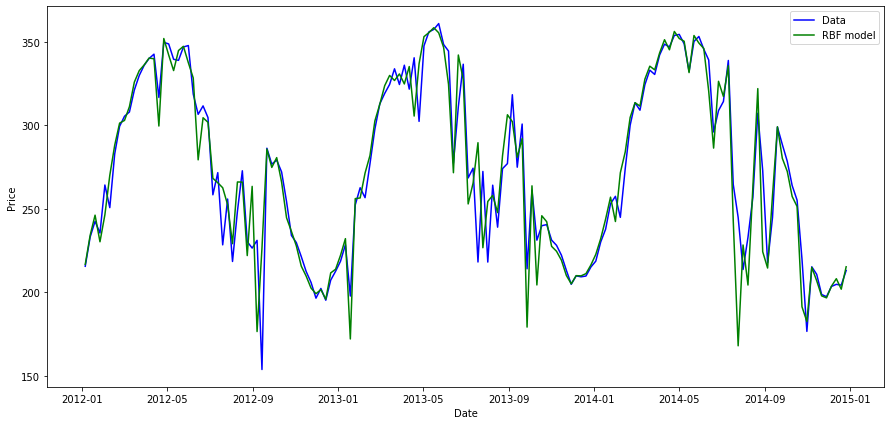

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
df1 = pd.DataFrame(columns=['Date','GHI'])
df1['Date'] = y_w[626:-1].index
df1['GHI'] = np.asarray(yhat).reshape(156,)
df1.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/LSTMweekly.csv')

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False)

16.459688859236156

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,))

0.038683815933012754